In [2]:
import pandas as pd
import numpy as np

X_train= pd.read_csv("../train-test/X_train_large.csv")
X_test= pd.read_csv("../train-test/X_test_large.csv")
y_train= pd.read_csv("../train-test/y_train.csv")
y_test= pd.read_csv("../train-test/y_test.csv")
X_train_short= pd.read_csv("../train-test/X_train_short.csv")
X_test_short= pd.read_csv("../train-test/X_test_short.csv")
X_train_medium= pd.read_csv("../train-test/X_train_medium.csv")
X_test_medium= pd.read_csv("../train-test/X_test_medium.csv")

Testiamo il KNN Regressor su un generico K=4 dove K indica il numero di vicini

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

#Train Model and Predict
k = 4  
#TODO problema dovuto all y_train sus 
neigh = KNeighborsRegressor(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",sqrt(mean_squared_error(y_test,Pred_y)))

Accuracy of model at K=4 is 0.383364616756385


Min Error:- 0.38293471239568605 at K = 13


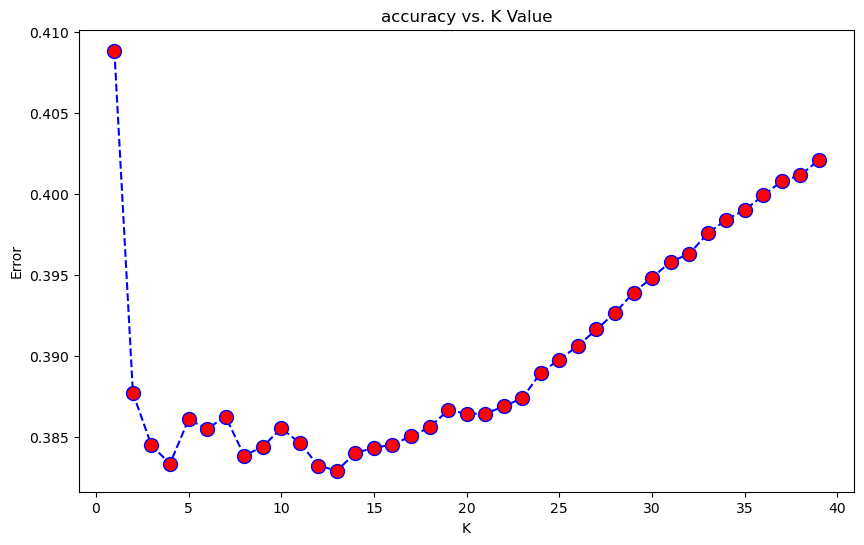

In [4]:
acc = []
# Will take some time
for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(sqrt(mean_squared_error(y_test,yhat)))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
print("Min Error:-",min(acc),"at K =",acc.index(min(acc))+1)

Min Error:- 0.21428190404720787 at K = 8


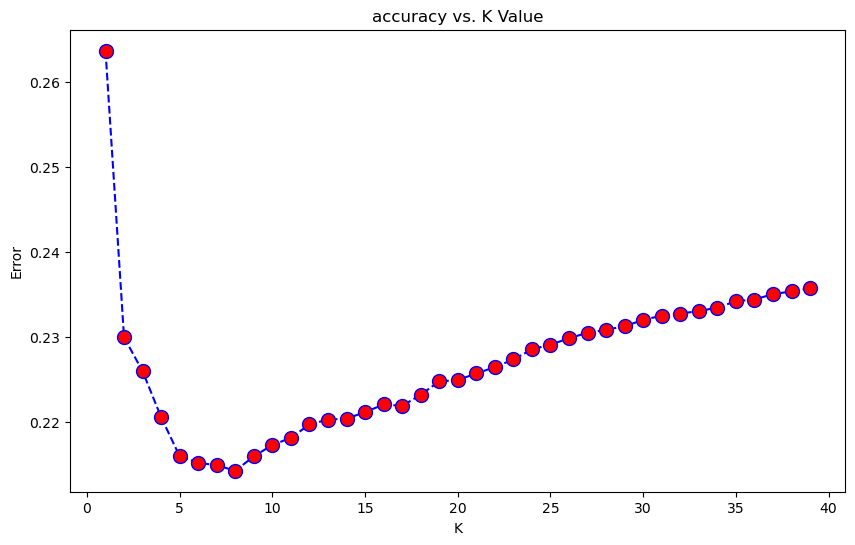

In [5]:
#SHORT

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train_short,y_train)
    yhat = neigh.predict(X_test_short)
    acc.append(sqrt(mean_squared_error(y_test,yhat)))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
print("Min Error:-",min(acc),"at K =",acc.index(min(acc))+1)

Min Error:- 0.3768945198379045 at K = 4


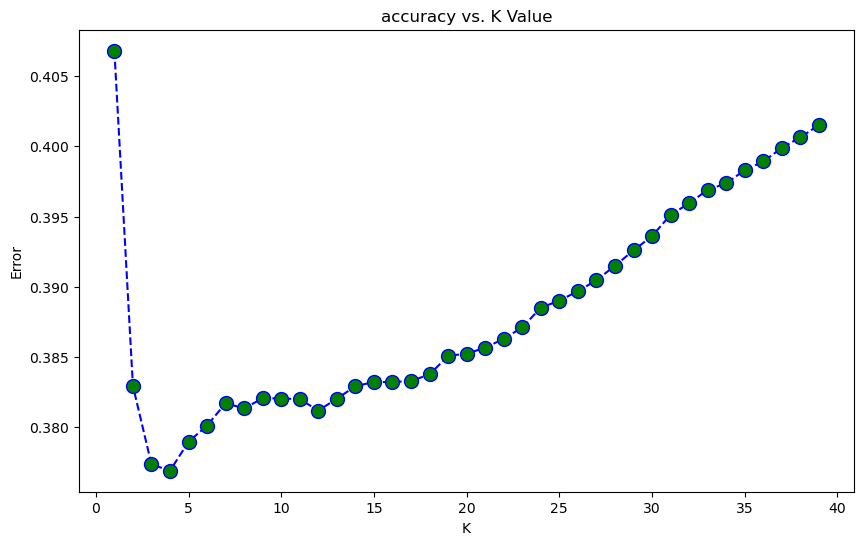

In [6]:
#MEDIUM

acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train_medium,y_train)
    yhat = neigh.predict(X_test_medium)
    acc.append(sqrt(mean_squared_error(y_test,yhat)))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='green', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Error')
print("Min Error:-",min(acc),"at K =",acc.index(min(acc))+1)

# TUNING KNN

In [7]:


rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.40885146757394547
RMSE value for k=  2 is: 0.38772651936408153
RMSE value for k=  3 is: 0.38449622839447434
RMSE value for k=  4 is: 0.383364616756385
RMSE value for k=  5 is: 0.38609935475984436
RMSE value for k=  6 is: 0.38552879145429336
RMSE value for k=  7 is: 0.3862628554806594
RMSE value for k=  8 is: 0.38386887272500037
RMSE value for k=  9 is: 0.3844138873183102
RMSE value for k=  10 is: 0.38555653116947025
RMSE value for k=  11 is: 0.3846412456223716
RMSE value for k=  12 is: 0.3832524133074419
RMSE value for k=  13 is: 0.38293471239568605
RMSE value for k=  14 is: 0.3840356700963019
RMSE value for k=  15 is: 0.38434392522275884
RMSE value for k=  16 is: 0.3845478882370539
RMSE value for k=  17 is: 0.38505921980937585
RMSE value for k=  18 is: 0.38561846010733
RMSE value for k=  19 is: 0.38666494462854206
RMSE value for k=  20 is: 0.3864599411527545


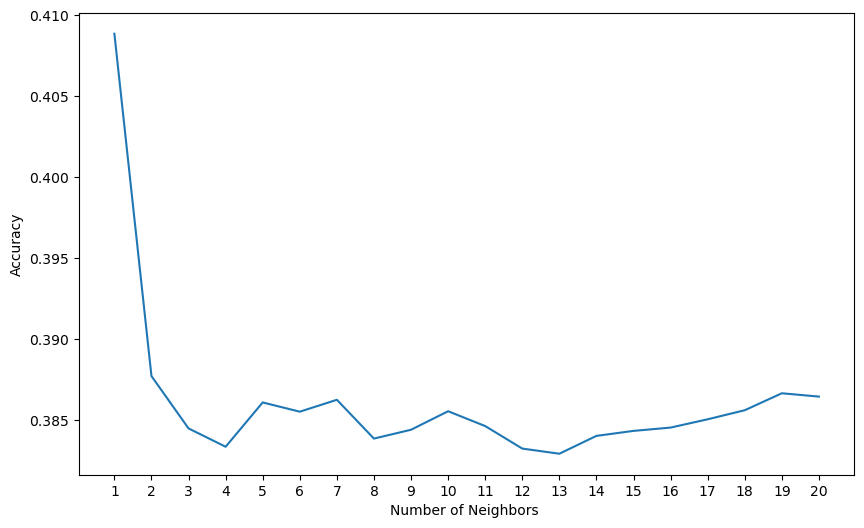

In [8]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), rmse_val)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : range(1,50,2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [10]:
gs = GridSearchCV(KNeighborsRegressor(), grid_params, verbose = 1, cv=3,scoring='r2', n_jobs = -1)

In [11]:
g_res = gs.fit(X_train_medium, y_train)
g_res.best_score_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


0.7421771033706617

Score della grid 
```
best score medium = 0.7402299900227032
best score large = 0.7345585237997048
best score short = 0.6784007412698685
```

In [12]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

```
best param = {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
```

In [13]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i, metric='manhattan', weights='distance').fit(X_train,y_train)
    print(knn.score(X_test,y_test))
    yhat= knn.predict(X_test)
    mean_acc[i-1] = sqrt(mean_squared_error(y_test,yhat))


0.16616500627472752
0.25258925451517844
0.280319418145776
0.28108261815154
0.2770491726692528
0.2811980519902575
0.27943336901670823
0.27830178273800643
0.2790570469175091
0.2813621989630912
0.28023417418921426
0.28028926205374827
0.2782413987948462
0.2775124271389755
0.27390740813389125
0.27193453188914174
0.26818127228823807
0.2656191914005266
0.2644913213854613
0.26131234360324973


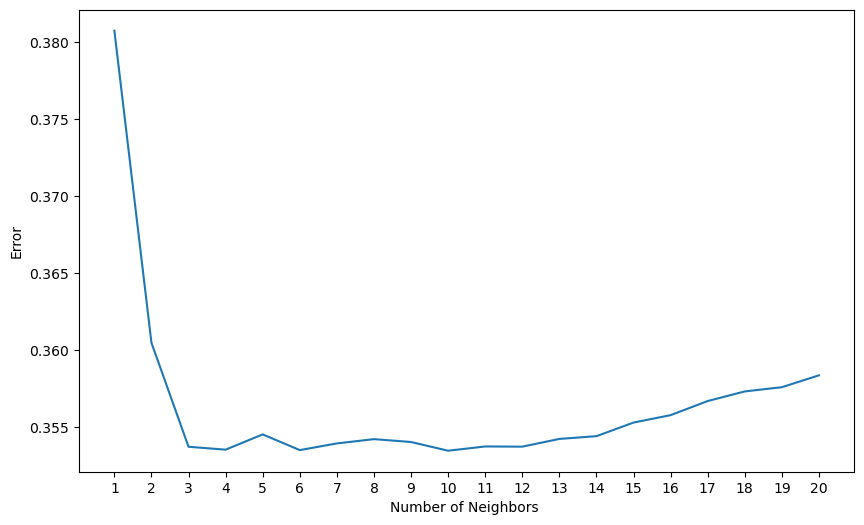

In [14]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Error')
plt.show()

In [15]:
#Effettuamo il KNN su i valori ottimali del database X_train quindi large
knn = KNeighborsRegressor(n_neighbors = 5, weights = 'distance', metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan', weights='distance')

In [16]:
y_knn = knn.predict(X_test)

In [17]:
#BEST accuracy
knn.score(X_test,y_test)

0.2770491726692528

In [18]:

print('Test set performance: ',sqrt(mean_squared_error(y_test, y_knn)))

Test set performance:  0.35451667743541965


In [19]:
knn.fit(X_train_short, y_train)
y_knn_short = knn.predict(X_test_short)
#BEST accuracy
knn.score(X_test_short,y_test)
print('Test set performance: ',sqrt(mean_squared_error(y_test, y_knn_short)))

Test set performance:  0.20280216407021068


In [20]:
#KNN FIT SULLA MEDIUM
knn.fit(X_train_medium, y_train)
y_knn_medium = knn.predict(X_test_medium)
#BEST accuracy
knn.score(X_test_medium,y_test)
print('Test set performance: ',sqrt(mean_squared_error(y_test, y_knn_medium)))

Test set performance:  0.3506371904664783


In [21]:
from ipynb.fs.defs.data_analysis import save_regressor
save_regressor(knn)

In [22]:
from ipynb.fs.defs.data_analysis import model_analysis
data = model_analysis(knn)


enter
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.811  5.944220e+09  1.259977e+09
KNeighborsRegressor    0.817  5.671486e+09  1.402773e+09
LGBMRegressor          0.890  5.877599e+09  7.829204e+08
LinearRegression       0.846  5.482299e+09  1.372148e+09
RandomForestRegressor  0.891  5.651420e+09  8.100146e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.800  5.781312e+09  1.412329e+09
KNeighborsRegressor    0.291  5.000611e+09  4.722684e+09
LGBMRegressor          0.902  5.800592e+09  6.866333e+08
LinearRegression       0.846  5.481269e+09  1.456500e+09
RandomForestRegressor  0.902  5.527662e+09  7.257831e+08
                       Score      Variance           MSE
name                                                    
DecisionTreeRegressor  0.796  5.791097e+09  1.416795e+09
KNeighborsRegressor    0.